# Задание
## С помощью дифференциального рендеринга сделать рендер модели дефолтного лица похожим на свою фотографию
источник https://habr.com/ru/companies/itmai/articles/520268/

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.8
from IPython.display import clear_output
clear_output()
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --config python3
!python3 --version
!sudo apt install python3-pip
!sudo apt install python3.8-distutils

In [ ]:
!pip install torch torchvision torchaudio
!pip install redner-gpu h5py matplotlib ipython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python /content/drive/MyDrive/Colab_Notebooks/3laba/main.py

/content/drive/MyDrive/Colab_Notebooks/3laba/main.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  shape_basis = torch.tensor(hf['shape/model/pcaBasis'],
/usr/local/lib/python3.8/dist-packages/pyredner/render_pytorch.py:55: UserWarning: Converting texture from cpu to cuda:0, this can be inefficient.
  warnings.warn('Converting texture from {} to {}, this can be inefficient.'.format(mipmap.device, device))
Scene construction, time: 0.06624 s
Forward pass, time: 0.02795 s
/usr/local/lib/python3.8/dist-packages/pyredner/render_pytorch.py:55: UserWarning: Converting texture from cpu to cuda:0, this can be inefficient.
  warnings.warn('Converting texture from {} to {}, this can be inefficient.'.format(mipmap.device, device))
Scene construction, time: 0.01721 s
Forward pass, ti

## Отображение результата

In [1]:
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
import torch

In [2]:
imgs = []
for i in range(500):
  if i % 10 == 0:
    imgs.append(torch.tensor(plt.imread(f'res/train_{i}.png')))

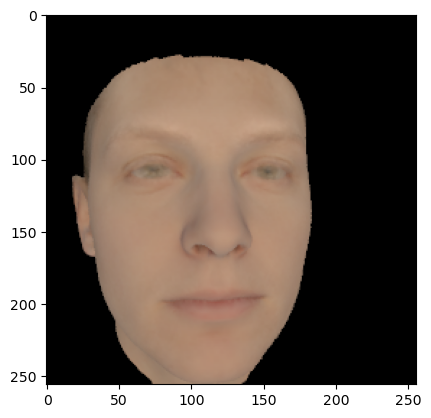

In [3]:
fig = plt.figure()

# Clamp to avoid complains
im = plt.imshow(imgs[0].clamp(0.0, 1.0), animated=True)

def update_fig(i):
    im.set_array(imgs[i].clamp(0.0, 1.0))
    return im,
anim = animation.FuncAnimation(fig, update_fig,
                               frames=len(imgs), interval=50, blit=True)
HTML(anim.to_jshtml())